Import Required Libraries

In [43]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.3.0


In [3]:
# mnist is a hand written digts data set
# size of the image is 28*28
mnist = tf.keras.datasets.mnist

Load Data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Convert y_train, y_test to categorical

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [6]:
print("X Train Shape: ", x_train.shape)
print("Y Train Shape: ", y_train.shape)
print("X Test Shape: ", x_test.shape)
print("Y Test Shape: ", y_test.shape)

X Train Shape:  (60000, 28, 28)
Y Train Shape:  (60000, 10)
X Test Shape:  (10000, 28, 28)
Y Test Shape:  (10000, 10)


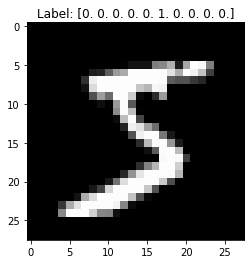

In [7]:
plt.imshow(x_train[0], cmap="gray")
plt.title("Label: {}".format(y_train[0]))
plt.show()

Normalise The Pixel Values

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3,3), padding="Same", activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())


model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [10]:
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [12]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/20
469/469 [==============================] - 270s 575ms/step - loss: 0.1134 - accuracy: 0.9697 - val_loss: 0.2247 - val_accuracy: 0.9431
Epoch 2/20
469/469 [==============================] - 269s 574ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 3/20
469/469 [==============================] - 269s 574ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0522 - val_accuracy: 0.9861
Epoch 4/20
469/469 [==============================] - 269s 574ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0346 - val_accuracy: 0.9906
Epoch 5/20
469/469 [==============================] - 269s 574ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0486 - val_accuracy: 0.9862
Epoch 6/20
469/469 [==============================] - 268s 572ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0450 - val_accuracy: 0.9887
Epoch 7/20
469/469 [==============================] - 268s 572ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0379 -

In [13]:
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(train_accuracy))

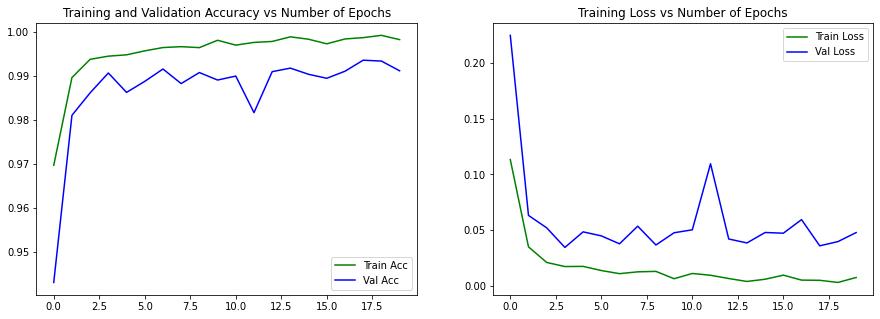

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, "green", label="Train Acc")
plt.plot(epochs, val_accuracy, "blue", label="Val Acc")
plt.title("Training and Validation Accuracy vs Number of Epochs")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, "green", label="Train Loss")
plt.plot(epochs, val_loss, "blue", label="Val Loss")
plt.title("Training Loss vs Number of Epochs")
plt.legend()
plt.show()

In [33]:
y_hat = model.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

In [44]:
print("Accuracy Score: ", accuracy_score(y_true, y_pred))

Accuracy Score:  0.9911


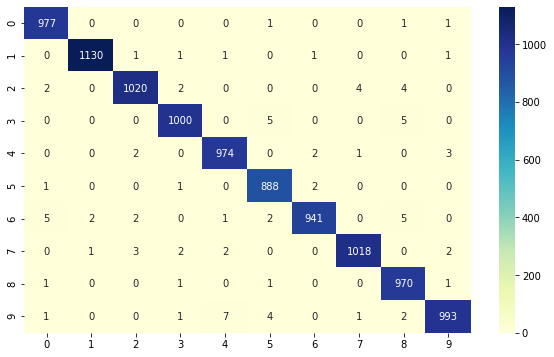

In [42]:
plt.figure(figsize=(10,6)) 
sns.heatmap(cm, annot = True, fmt = ".0f", cmap = "YlGnBu")
plt.show()

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



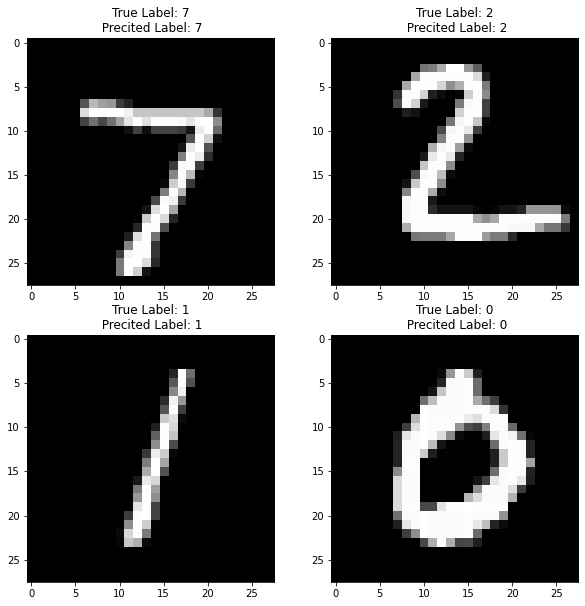

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.title("True Label: {}\n Precited Label: {}".format(y_true[0], y_pred[0]))
plt.subplot(2,2,2)
plt.imshow(x_test[1].reshape(28, 28), cmap="gray")
plt.title("True Label: {}\n Precited Label: {}".format(y_true[1], y_pred[1]))
plt.subplot(2,2,3)
plt.imshow(x_test[2].reshape(28, 28), cmap="gray")
plt.title("True Label: {}\n Precited Label: {}".format(y_true[2], y_pred[2]))
plt.subplot(2,2,4)
plt.imshow(x_test[3].reshape(28, 28), cmap="gray")
plt.title("True Label: {}\n Precited Label: {}".format(y_true[3], y_pred[3]))
plt.show()